In [ ]:
#Loading the data set - training data.
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from gensim.models import KeyedVectors
from sklearn.impute import SimpleImputer
from nltk.tokenize import wordpunct_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.svm import LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [ ]:
tweet=pd.read_csv('/content/Final_ALL_Labled_012.csv', encoding='utf-8', usecols=['sentiment', 'full_text'])

In [ ]:
tweet.head()

,sentiment,full_text
0,1,بفضل الله قبل قليل وخلال ٩ دقاءق فقط اخذت لقاح...
1,0,لقاح كورونا اليوم مابدت الاعراض الا بعد ساعه م...
2,1,قبل موعد اخذي الجرعه الاولي من لقاح كورونا ظهر...
3,1,وخذينا الجرعه الاولي الحمدلله لقاح كورونا
4,1,اليوم اخذت الجرعه الاولي من لقاح كورونا عن طري...


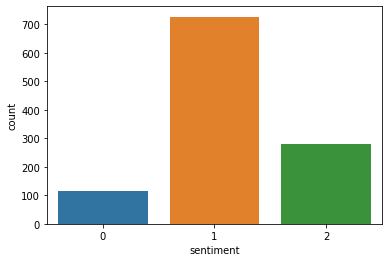

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=tweet)

In [ ]:
tweet.sentiment.value_counts()

1    727
2    280
0    116
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = tweet.full_text
y = tweet.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

847    من اعراض اللقاح حجز تذاكر السفر و بثقه كبيره ل...
726    حساسيه البنسلين لا تعتبر مانعا لتلقي لقاح فاير...
232    لكن كثيرا من الناس وخاصه الصبيان والمترفين يكر...
794    ولله الحمد تم اخذ اليوم لقاح كورونا كوفيد شكرا...
344    عندي سوال الحين اللقاح يعطونه للناس اللي ما جا...
Name: full_text, dtype: object

In [ ]:
len(X_test)

225

In [ ]:
y_train.value_counts()

1    577
2    227
0     94
Name: sentiment, dtype: int64

In [ ]:
y_test.value_counts()

1    150
2     53
0     22
Name: sentiment, dtype: int64

In [ ]:
# Removing stop words
def get_stop_words(path):
    #"stop_words.txt"
    stop_words = []
    with codecs.open(path, "r", encoding="utf-8", errors="ignore") as myfile:
        stop_words = myfile.readlines()
    stop_words = [word.strip() for word in stop_words]
    return stop_words
stop_words = get_stop_words('/content/stop_words_arabic.txt')

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

In [ ]:
# Extracting features from text files
count_vect = CountVectorizer(stop_words=stop_words)
X_train_counts = count_vect.fit_transform(X_train)
print('X_train_counts.shape', X_train_counts.shape)
    # TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print ('X_train_tfidf.shape',X_train_tfidf.shape)

X_train_counts.shape (898, 5094)
X_train_tfidf.shape (898, 5094)


In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
print(np.mean(predicted_svm == y_test))

predictions = text_clf_svm.predict(X_test)

        # macro accuracy (macro average)

        # precision and recall

print("Precision Score : ",precision_score(y_test, predictions, 
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           average='micro'))

0.7733333333333333
Precision Score :  0.7733333333333333
Recall Score :  0.7733333333333333


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[  5  10   7]
 [  3 137  10]
 [  2  19  32]]
              precision    recall  f1-score   support

           0       0.50      0.23      0.31        22
           1       0.83      0.91      0.87       150
           2       0.65      0.60      0.63        53

    accuracy                           0.77       225
   macro avg       0.66      0.58      0.60       225
weighted avg       0.75      0.77      0.76       225

0.7733333333333333


In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

[[0.5        0.3        0.2       ]
 [0.06024096 0.8253012  0.11445783]
 [0.14285714 0.20408163 0.65306122]]


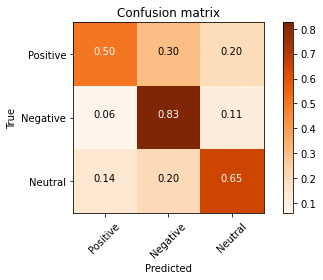

In [ ]:
import numpy
import itertools
class_labels = ['Positive', 'Negative', 'Neutral']
cm = confusion_matrix(y_test,predictions).T
plot_confusion_matrix(cm, classes = class_labels)